In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [147]:
df = pd.read_csv('BancoDeDados.csv')

In [148]:
df.keys()

Index(['amostra', 'id_cliente', 'id_unico_cliente', 'item_id', 'cep_cliente',
       'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido',
       'horario_pedido', 'pedido_aprovado', 'pedido_entregador',
       'pedido_entregue', 'data_estimada', 'id_vendedor', 'preco', 'frete',
       'pagamento_sequencial', 'pagamento_tipo', 'pagamento_prestacoes',
       'pagamento_valor', 'review', 'categoria', 'categoria_ingles',
       'cep_vendedor', 'cidade_vendedor', 'estado_vendedor'],
      dtype='object')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [150]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,8))
    
    g= sns.countplot(x=st, data=dados, orient='h')
    g.set_ylabel('Contagem', fontsize=17)
    
    sizes=[]
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+ p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/116581*100),
              ha= 'center', va='bottom', fontsize=12)
        
    g.set_ylim(0,max(sizes)*1.1)

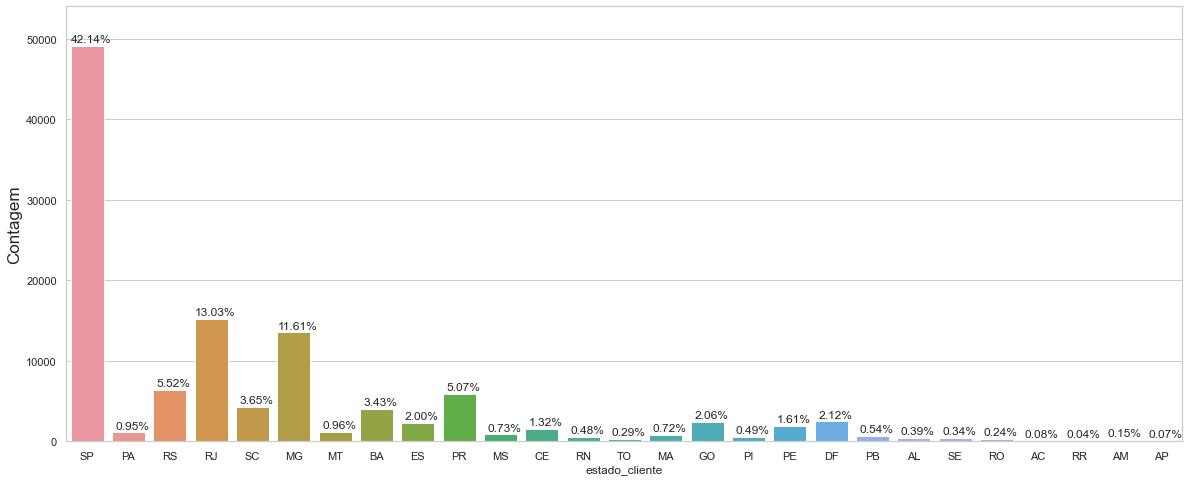

In [151]:
plot_perc('estado_cliente', df)

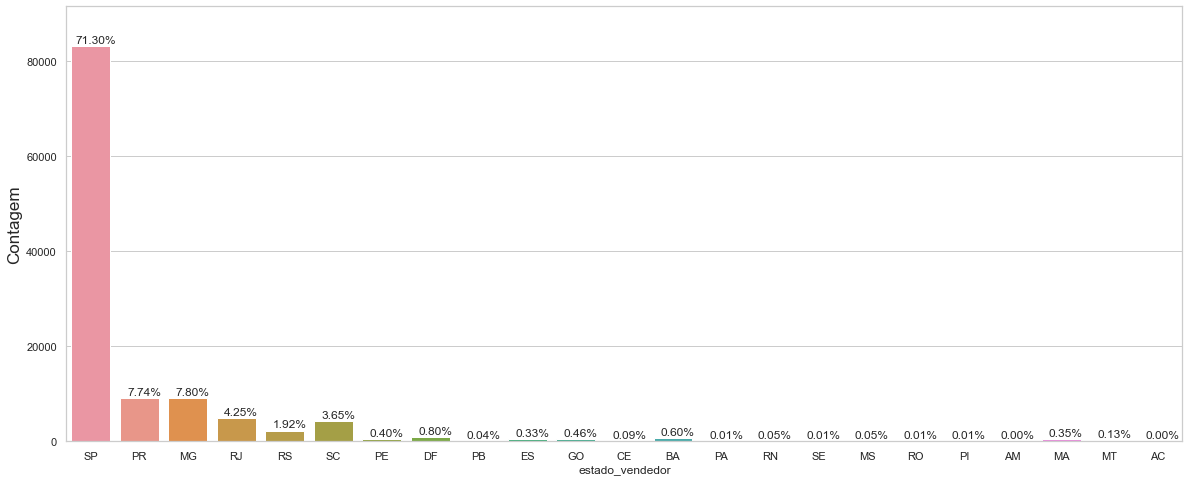

In [152]:
plot_perc('estado_vendedor',df)

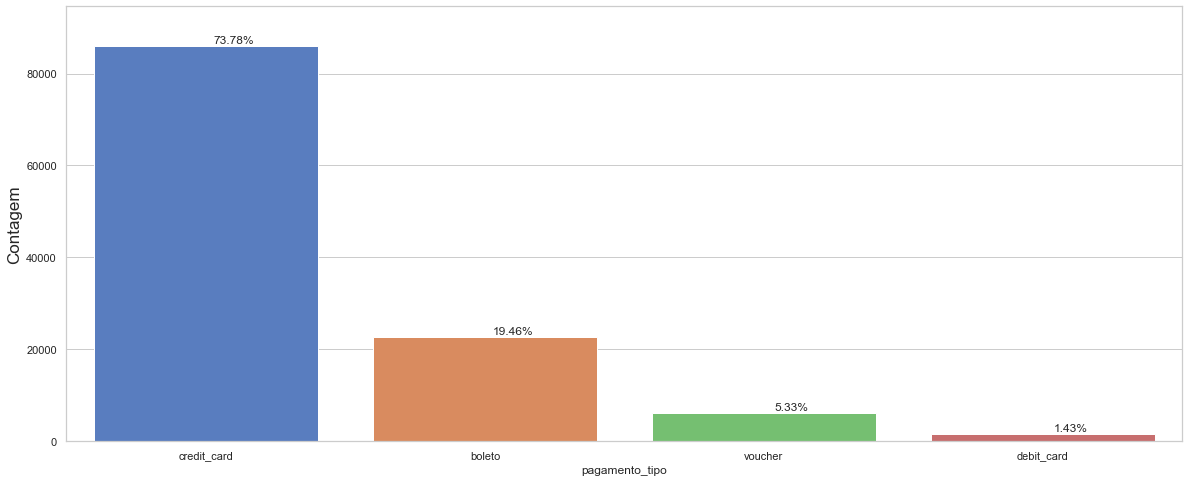

In [153]:
plot_perc('pagamento_tipo',df)

# Recência (R)

# Frequência (F)

# Monetaridade (M)

In [154]:
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [155]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente' , 'DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])
df_compra.head()

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [156]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max()- df_compra['DataMaxCompra']).dt.days
df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [157]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [158]:
from sklearn.cluster import KMeans
def calcular_wcss(data):
    wcss=[]
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        data['Cluster']= kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [159]:
df_recencia = df_usuario[['Recencia']]
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [160]:
soma_quadrados = calcular_wcss(df_recencia)

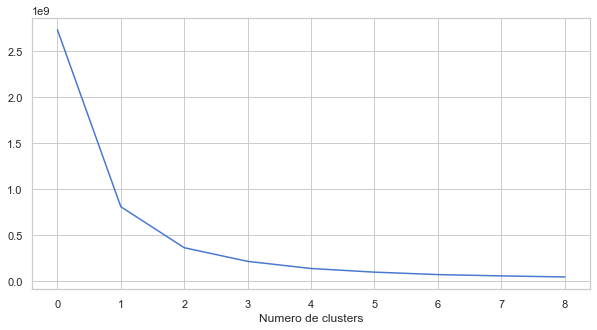

In [161]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Numero de clusters')
plt.show()

In [162]:
import math 
def numero_otimo_cluesters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0= i+2
        y0 =wcss[i]
        numerador = abs((y2-y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1 )
        denominador = math.sqrt((y2-y1)**2 + (x2 - x1)**2 )
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) +2

In [163]:
n = numero_otimo_cluesters(soma_quadrados)

In [164]:
n

4

In [165]:
# g = sns.countplot(x='estado_cliente', data=df, orient='h')
# g.set_title("Distribuição do estado dos clientes", fontsize=20)
# g.set_xlabel("Estado", fontsize=17)
# g.set_ylabel("Contagem", fontsize=17)
# g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [166]:
# plt.figure(figsize=(20,8))
# g2 = sns.boxplot(x='estado_cliente', y='preco',
#                  data=df[df['preco'] != -1])
# g2.set_title("Estado do Consumidor", fontsize=20)
# g2.set_xlabel("Estado", fontsize=17)
# g2.set_ylabel("Preço", fontsize=17)
# g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

In [167]:
# plt.figure(figsize=(20,8))
# g3 = sns.barplot(x='estado_cliente', y='frete',
#                  data=df[df['preco'] != -1])
# g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
# g3.set_xlabel("Estado do Consumidor", fontsize=17)
# g3.set_ylabel("Frete", fontsize=17)
# g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

In [168]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


In [169]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head()

,RecenciaCluster,Recencia
0,0,66.405850
1,1,319.404298
2,2,489.787907
3,3,187.293338


In [170]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='Recencia' , ascending = False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head()

,RecenciaCluster,Recencia
0,2,489.787907
1,1,319.404298
2,3,187.293338
3,0,66.405850


In [171]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado.head()

,RecenciaCluster,Recencia,index
0,2,489.787907,0
1,1,319.404298,1
2,3,187.293338,2
3,0,66.405850,3


In [172]:
juntado_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['RecenciaCluster', 'index' ]], on = 'RecenciaCluster')
juntado_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,2,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,2,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,2,0


In [173]:
removendo_dados = juntado_cluster.drop(['RecenciaCluster'], axis=1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [174]:
df_final = removendo_dados.rename(columns={'index':'RecenciaCluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [175]:
def ordenador_cluster(cluster_nome, target_nome, df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome , ascending = True).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntado_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome, 'index' ]], on = cluster_nome)
    removendo_dados = juntado_cluster.drop([cluster_nome], axis=1)
    df_final = removendo_dados.rename(columns={'index':cluster_nome})
    return df_final

In [176]:
df_usuario = ordenador_cluster('RecenciaCluster', 'Recencia', df_usuario)

In [177]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3


In [178]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0
1,33712.0,187.293338,35.169771,127.0,158.0,187.0,218.0,253.0
2,30757.0,319.404298,43.691600,254.0,281.0,313.0,356.0,404.0
3,20524.0,489.787907,59.600038,405.0,443.0,481.0,532.0,728.0


In [179]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [180]:
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1


In [181]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)

In [182]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()


,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
2,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
3,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0


In [183]:
df_usuario = ordenador_cluster('FrequenciaCluster', 'Frequencia', df_usuario)

In [184]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()


,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [185]:
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente','Receita']
df_usuario = pd.merge(df_usuario, df_receita, on = 'id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33


In [186]:
df_pagamento = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

In [187]:
df_usuario = ordenador_cluster('ReceitaCluster', 'Receita', df_usuario)

In [188]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114709.0,256.843780,360.390633,9.59,69.85,132.49,268.77,2869.25
1,1665.0,5510.153423,2784.346269,2889.60,3472.96,4345.50,6718.39,14963.64
2,199.0,26914.634523,10065.864450,16313.60,19167.26,22346.60,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [189]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33,0


In [190]:
# sudeste = ['SP', 'RJ', 'ES','MG']
# nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
# norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
# centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
# sul = ['SC', 'RS', 'PR']

# df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
# df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
# df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
# df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
# df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

# def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
#     temp = cols
#     cm = sns.light_palette("green", as_cmap=True)
#     return pd.crosstab(df[temp[0]], df[temp[1]],
#                        normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

# cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
#               values=df[df['preco'] != -1]['frete'], aggfunc='mean')          

In [191]:
df_final = df_usuario[['id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster', 'Receita', 'ReceitaCluster']]
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0


In [192]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

df_final['Pontuacao']= df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + df_usuario['ReceitaCluster']
df_final

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0,3
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0,3
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0,3
...,...,...,...,...,...,...,...,...
116576,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6
116577,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6
116578,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6
116579,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6


In [193]:
df_final.Pontuacao.max()

6

In [194]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao']>=1, 'Segmento']= 'Business'
df_final.loc[df_final['Pontuacao']>=3, 'Segmento']= 'Master'
df_final.loc[df_final['Pontuacao']>=5, 'Segmento']= 'Premium'

In [195]:
df_final['Segmento'].keys()

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            116571, 116572, 116573, 116574, 116575, 116576, 116577, 116578,
            116579, 116580],
           dtype='int64', length=116581)

In [196]:
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3,Master
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3,Master
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0,3,Master
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0,3,Master
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0,3,Master


In [197]:
df_final.to_csv('RFM.csv')

In [198]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento', data=data, size='Segmento', sizes=(50,150), size_order=['Premium', 'Master', 'Business', 'Inativo'])
    plt.show()

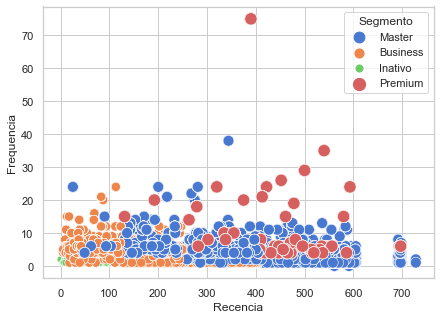

In [199]:
plot_segmento('Recencia', 'Frequencia', df_final)

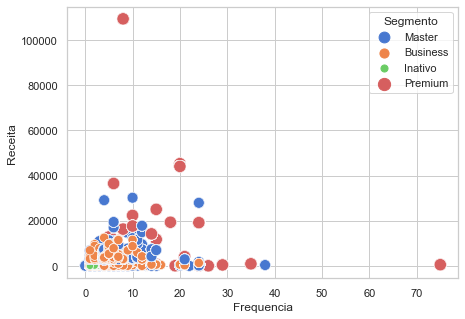

In [200]:
plot_segmento('Frequencia','Receita', df_final)

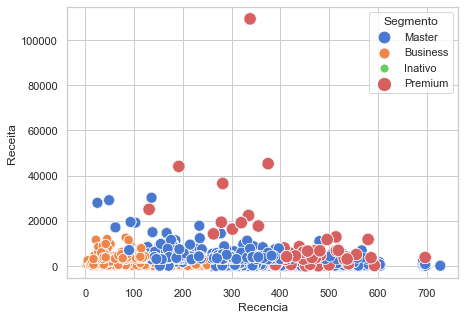

In [201]:
plot_segmento('Recencia','Receita', df_final)

<AxesSubplot:xlabel='Segmento', ylabel='count'>

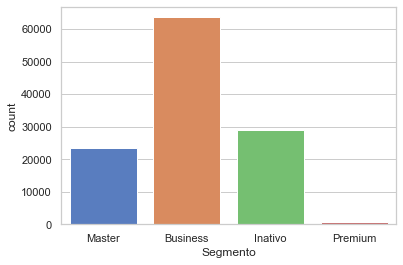

In [202]:
sns.countplot(df_final['Segmento'])

In [203]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.5984371853480713
Silhueta para 3 clusters : 0.5764801599406714
Silhueta para 4 clusters : 0.5577724827866245
Silhueta para 5 clusters : 0.5582199769652869
Silhueta para 6 clusters : 0.5590740143031955
Silhueta para 7 clusters : 0.56163081351148
Silhueta para 8 clusters : 0.5523344546102278
Silhueta para 9 clusters : 0.5584876735170744
Silhueta para 10 clusters : 0.569388968495242


In [ ]:
df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Campeao'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Fiel'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Potencialmente Fiel - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Potencialmente Fiel - Tipo 2'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] = 'Novos'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] = 'Promissores'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Precisam Atencao'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Quase em Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] ='Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] ='Nao pode perder - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Hibernando'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] ='Perdidos'

In [ ]:
def agrupar(p,q,r,segmento):
    df_final.loc[(df_final['RecenciaCluster']==p) & (df_final['FrequenciaCluster']==q) & (df_final['ReceitaCluster']==r),'Segmento'] ='segmento’